<a href="https://colab.research.google.com/github/BetulCengiz/Emotion-Analysis-from-Albanian-Speech-Data/blob/main/Xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from skimage.transform import resize
import tensorflow as tf
from tensorflow.keras import layers,models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import shutil
from keras.preprocessing import image


In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
# Path to the uploaded folder
folder_path1 = '/content/drive/My Drive/Proje/140'

# List files in the folder
uploaded = os.listdir(folder_path1)

# Do whatever you want with the files
print(uploaded)

import os

# Get the directory path where the files are uploaded
uploaded_directory = '/content/drive/My Drive/Proje/140'  # Assuming the files are uploaded to the default directory in Colab

# List files in the directory
ses_dosyalari = os.listdir(uploaded_directory)

# Filter only .wav files
ses_dosyalari = [dosya for dosya in ses_dosyalari if dosya.endswith(".wav")]

import shutil
import os

# Path to the uploaded folder
folder_path = '/content/drive/My Drive/Proje/ArnavutSes'

# List files in the folder
etiketlenmis_dizin = os.listdir(folder_path)

# Do whatever you want with the files
print(etiketlenmis_dizin)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['sinirli10.wav', 'uzgun7.wav', 'sinirli26.wav', 'saskin15.wav', 'sinirli11.wav', 'sinirli5.wav', 'uzgun5.wav', 'saskin12.wav', 'uzgun11.wav', 'sinirli25.wav', 'mutlu12.wav', 'sinirli13.wav', 'mutlu23.wav', 'mutlu28.wav', 'saskin28.wav', 'mutlu21.wav', 'saskin33.wav', 'mutlu4.wav', 'sinirli22.wav', 'sinirli24.wav', 'sinirli35.wav', 'saskin31.wav', 'saskin20.wav', 'mutlu27.wav', 'uzgun13.wav', 'uzgun24.wav', 'mutlu14.wav', 'sinirli34.wav', 'mutlu16.wav', 'sinirli23.wav', 'mutlu24.wav', 'uzgun6.wav', 'uzgun9.wav', 'uzgun19.wav', 'mutlu11.wav', 'mutlu22.wav', 'uzgun30.wav', 'mutlu30.wav', 'uzgun1.wav', 'saskin21.wav', 'uzgun26.wav', 'sinirli28.wav', 'sinirli31.wav', 'uzgun17.wav', 'sinirli20.wav', 'sinirli6.wav', 'saskin22.wav', 'mutlu36.wav', 'mutlu33.wav', 'sinirli21.wav', 'uzgun20.wav', 'saskin2.wav', 'uzgun23.wav', 'uzgun25.wav', 'mutlu5.wav', 'saskin10.wav'

In [ ]:
uploaded_directory = ('/content/drive/MyDrive/Proje/ArnavutSes')
ses_dosyalari = os.listdir(uploaded_directory)
# Filter only .wav files
ses_dosyalari = [dosya for dosya in ses_dosyalari if dosya.endswith(".wav")]

import shutil

# Path to the uploaded folder
folder_path =('/content/drive/MyDrive/Proje/ArnavutSes')


# List files in the folder
etiketlenmis_dizin = os.listdir(folder_path)

# Do whatever you want with the files
print(etiketlenmis_dizin)

# from google.colab import files

# etiketlenmis_dizin = files.upload()


['sad', 'surprised', 'happy', 'angry']


In [ ]:
import os
import shutil

# Define the directory paths
source_directory = '/content/drive/My Drive/Proje/140'  # Replace with the actual directory path
destination_directory = '/content/etiketliarnavut/'  # Replace with your desired path

# Create the labeled directory if it does not exist
if not os.path.exists(destination_directory):
    os.makedirs(destination_directory)

# Create subdirectories for each emotion
emotions = ['angry', 'surprised', 'happy', 'sad']
for emotion in emotions:
    emotion_directory = os.path.join(destination_directory, emotion)
    if not os.path.exists(emotion_directory):
        os.makedirs(emotion_directory)

# Function to clean and label the files
def clean_and_label_files(source_directory, destination_directory):
    for file in os.listdir(source_directory):
        if file.endswith('.wav'):
            # Extract the emotion code from the file name
            emotion_code = ''.join([i for i in file if not i.isdigit()]).replace('.wav', '')

            if emotion_code in ['mutlu', 'uzgun', 'sinirli', 'saskin']:
                label = {
                    'mutlu': 'happy',
                    'uzgun': 'sad',
                    'sinirli': 'angry',
                    'saskin': 'surprised'
                }[emotion_code]

                labeled_directory_path = os.path.join(destination_directory, label)
                os.makedirs(labeled_directory_path, exist_ok=True)

                source_path = os.path.join(source_directory, file)
                destination_path = os.path.join(labeled_directory_path, file)
                shutil.copyfile(source_path, destination_path)

                print(f"Labeled file '{file}' as '{label}'. Moved to '{labeled_directory_path}'")
            else:
                print(f"Invalid emotion code '{emotion_code}' for file: {file}. Skipping...")
        else:
            print(f"File '{file}' is not a .wav file. Skipping...")

# Call the function to clean and label the files
clean_and_label_files(source_directory, destination_directory)

Labeled file 'sinirli10.wav' as 'angry'. Moved to '/content/etiketliarnavut/angry'
Labeled file 'uzgun7.wav' as 'sad'. Moved to '/content/etiketliarnavut/sad'
Labeled file 'sinirli26.wav' as 'angry'. Moved to '/content/etiketliarnavut/angry'
Labeled file 'saskin15.wav' as 'surprised'. Moved to '/content/etiketliarnavut/surprised'
Labeled file 'sinirli11.wav' as 'angry'. Moved to '/content/etiketliarnavut/angry'
Labeled file 'sinirli5.wav' as 'angry'. Moved to '/content/etiketliarnavut/angry'
Labeled file 'uzgun5.wav' as 'sad'. Moved to '/content/etiketliarnavut/sad'
Labeled file 'saskin12.wav' as 'surprised'. Moved to '/content/etiketliarnavut/surprised'
Labeled file 'uzgun11.wav' as 'sad'. Moved to '/content/etiketliarnavut/sad'
Labeled file 'sinirli25.wav' as 'angry'. Moved to '/content/etiketliarnavut/angry'
Labeled file 'mutlu12.wav' as 'happy'. Moved to '/content/etiketliarnavut/happy'
Labeled file 'sinirli13.wav' as 'angry'. Moved to '/content/etiketliarnavut/angry'
Labeled file 

In [ ]:
# Commented out IPython magic to ensure Python compatibility.
import numpy as np
import librosa.display
import os
import matplotlib.pyplot as plt
# %matplotlib inline

def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    ses, ornekleme_hizi = librosa.load(audio_file, sr=None)
    mel_spektrogram = librosa.feature.melspectrogram(y=ses, sr=ornekleme_hizi)

    mel_spektrogram = librosa.power_to_db(mel_spektrogram, ref=np.max)

    librosa.display.specshow(mel_spektrogram, sr=ornekleme_hizi, x_axis='time', y_axis='mel', fmax=8000)
    plt.colorbar(format='%+2.0f dB')
    fig.savefig(image_file)
    plt.close(fig)

def create_pngs_from_wavs(input_path, output_path):
    """

    Args:
      input_path:
      output_path:
    """
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        create_spectrogram(input_file, output_file)

create_pngs_from_wavs('etiketliarnavut/angry', 'Spectrograms/angry')

create_pngs_from_wavs('etiketliarnavut/happy', 'Spectrograms/happy')

create_pngs_from_wavs('etiketliarnavut/sad', 'Spectrograms/sad')

create_pngs_from_wavs('etiketliarnavut/surprised', 'Spectrograms/surprised')


111 111


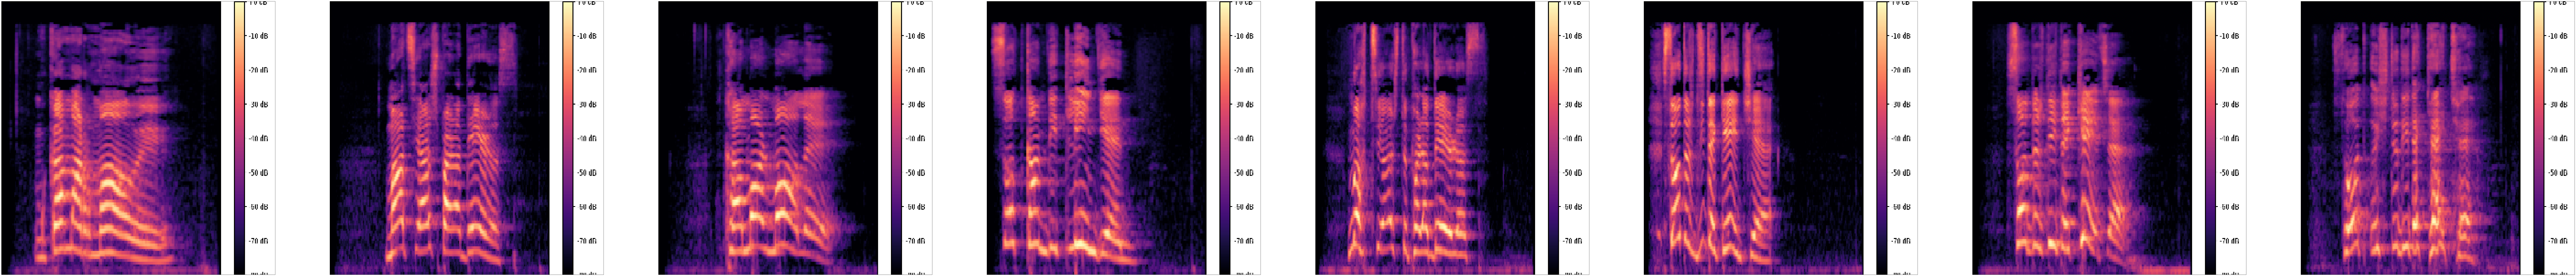

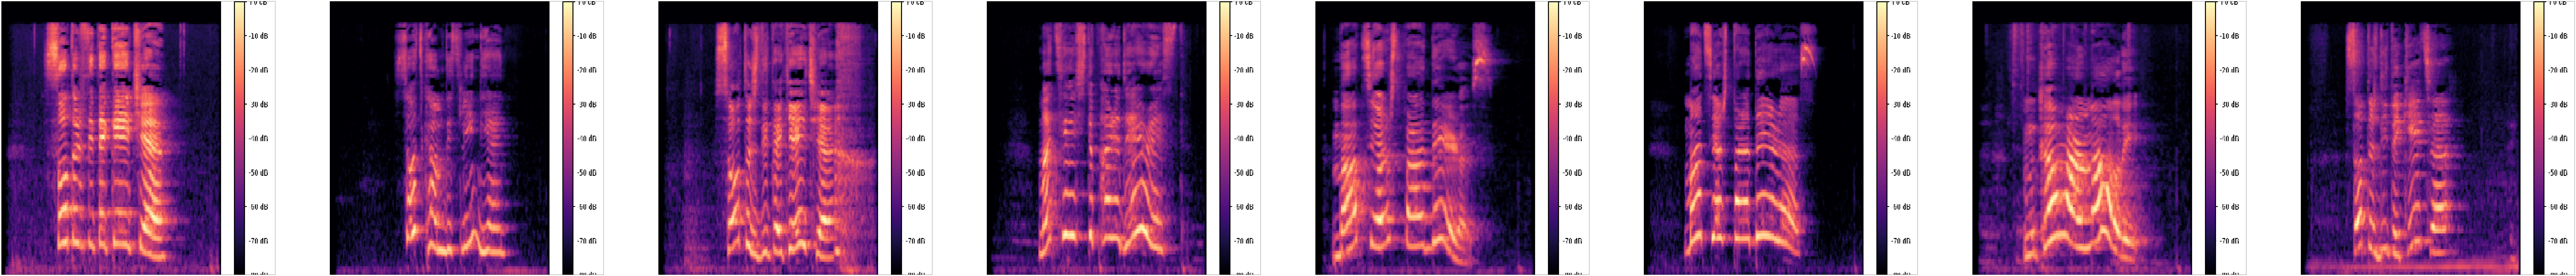

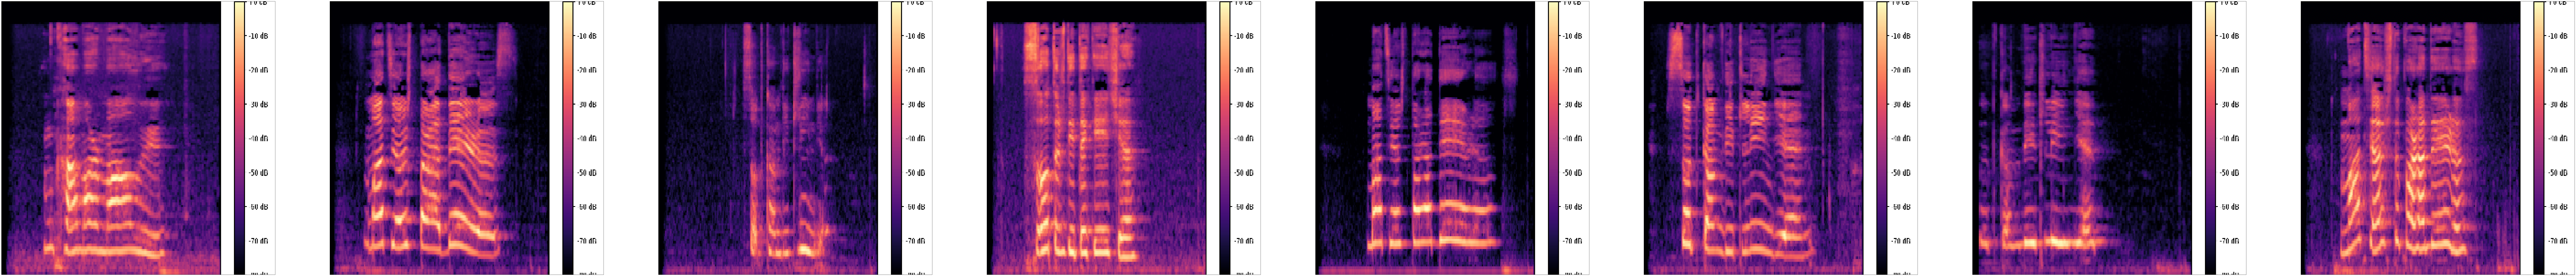

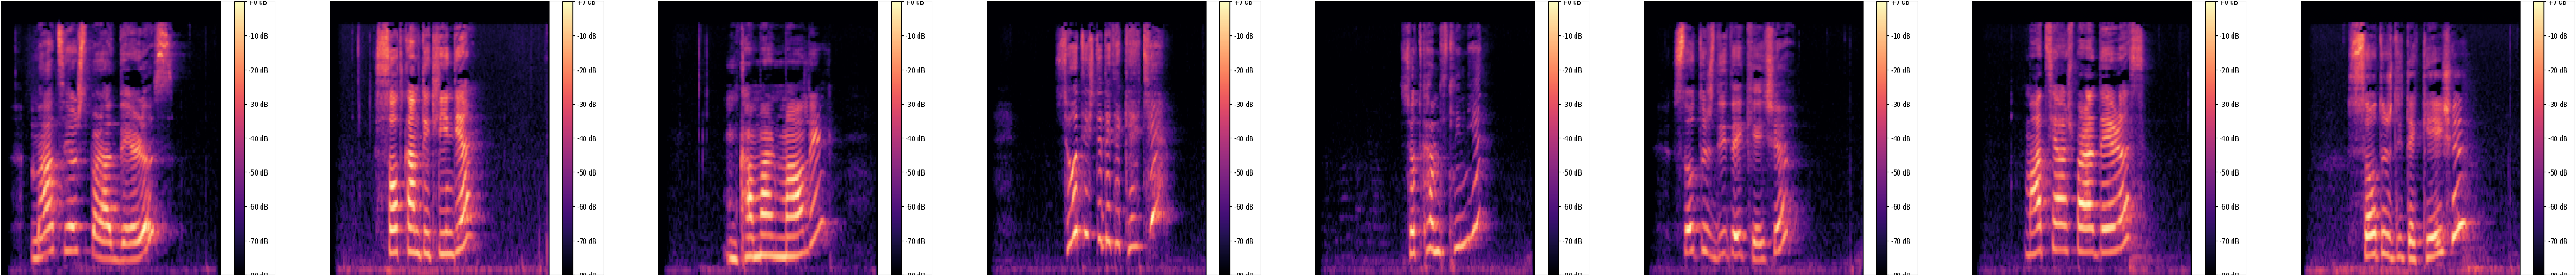

In [ ]:
from keras.preprocessing import image
import os

def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(299, 299))))
        labels.append((label))

    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(240, 240), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)

x = []
y = []

images, labels = load_images_from_path('Spectrograms/angry', "angry")
show_images(images)

x += images
y += labels

images, labels = load_images_from_path('Spectrograms/happy', "happy")
show_images(images)

x += images
y += labels

images, labels = load_images_from_path('Spectrograms/sad', "sad")
show_images(images)

x += images
y += labels

images, labels = load_images_from_path('Spectrograms/surprised', "surprised")
show_images(images)

x += images
y += labels

from skimage.transform import resize

hedef_boyut = (299, 299)
yeniden_boyutlandirilmis_spektrogramlar = []
for mel_spektrogram in x:
    mel_spektrogram_boyut = mel_spektrogram.shape
    if mel_spektrogram_boyut != hedef_boyut:
        # Mel-spektrogramu hedef boyuta yeniden boyutlandır
        yeniden_boyutlandirilmis = resize(mel_spektrogram, hedef_boyut, anti_aliasing=True)
    else:
        yeniden_boyutlandirilmis = mel_spektrogram
    yeniden_boyutlandirilmis_spektrogramlar.append(yeniden_boyutlandirilmis)

X = np.array(yeniden_boyutlandirilmis_spektrogramlar)

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()
y_numerical = label_encoder.fit_transform(y)

y_one_hot = to_categorical(y_numerical)

X_train, X_test, Y_train_one_hot, Y_test_one_hot = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

print(len(X_train), len(Y_train_one_hot))


Epoch 1/70
4/4 [==============================] - 14s 751ms/step - loss: 1.3935 - accuracy: 0.2523 - val_loss: 1.5784 - val_accuracy: 0.2500 - lr: 1.0000e-04
Epoch 2/70
4/4 [==============================] - 2s 434ms/step - loss: 1.3227 - accuracy: 0.3694 - val_loss: 1.3396 - val_accuracy: 0.3571 - lr: 1.0000e-04
Epoch 3/70
4/4 [==============================] - 2s 401ms/step - loss: 1.3024 - accuracy: 0.4685 - val_loss: 1.3745 - val_accuracy: 0.3214 - lr: 1.0000e-04
Epoch 4/70
4/4 [==============================] - 1s 367ms/step - loss: 1.2020 - accuracy: 0.4865 - val_loss: 1.3987 - val_accuracy: 0.2500 - lr: 1.0000e-04
Epoch 5/70
4/4 [==============================] - 2s 402ms/step - loss: 1.1576 - accuracy: 0.5495 - val_loss: 1.4364 - val_accuracy: 0.1786 - lr: 1.0000e-04
Epoch 6/70
4/4 [==============================] - 2s 406ms/step - loss: 1.0645 - accuracy: 0.5405 - val_loss: 1.4985 - val_accuracy: 0.1429 - lr: 1.0000e-04
Epoch 7/70
4/4 [==============================] - 2s 413m

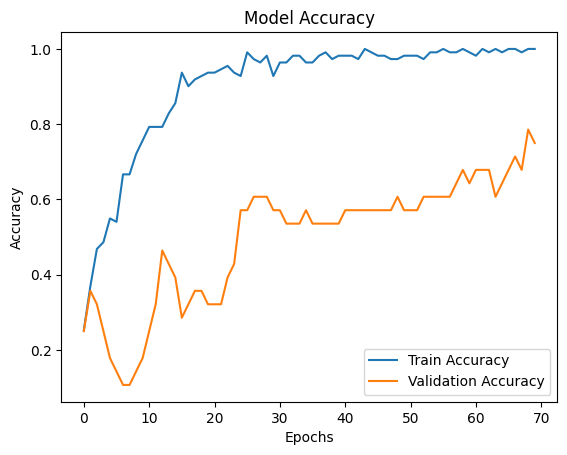

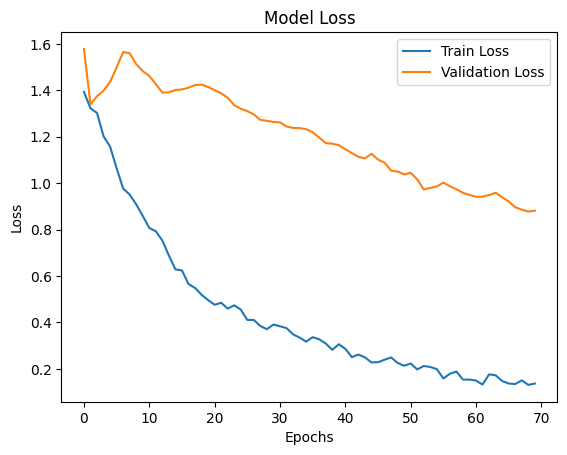

1/1 [==============================] - 1s 746ms/step
              precision    recall  f1-score   support

       angry       0.80      0.57      0.67         7
       happy       0.75      0.75      0.75         8
         sad       0.50      0.75      0.60         4
   surprised       0.89      0.89      0.89         9

    accuracy                           0.75        28
   macro avg       0.73      0.74      0.73        28
weighted avg       0.77      0.75      0.75        28



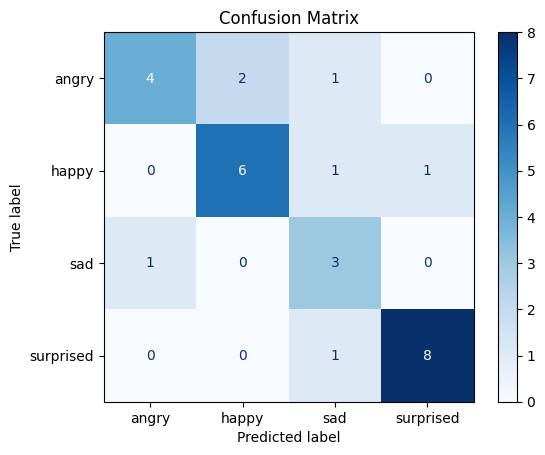

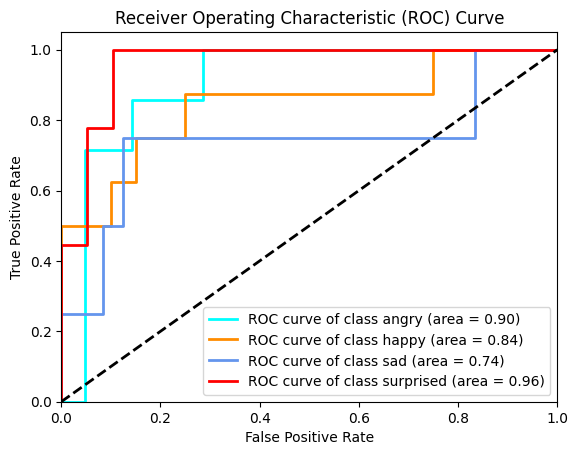

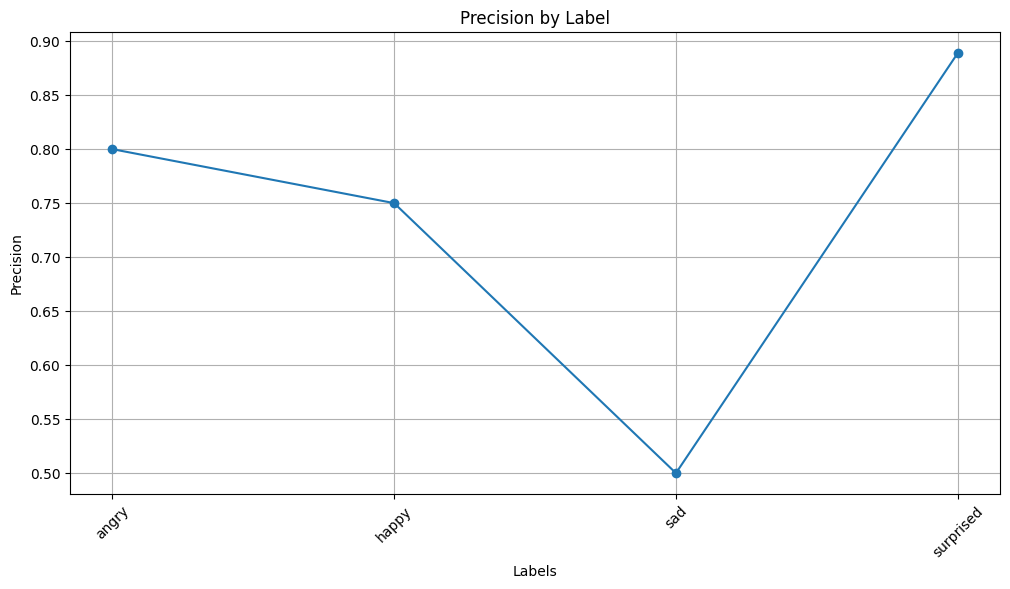

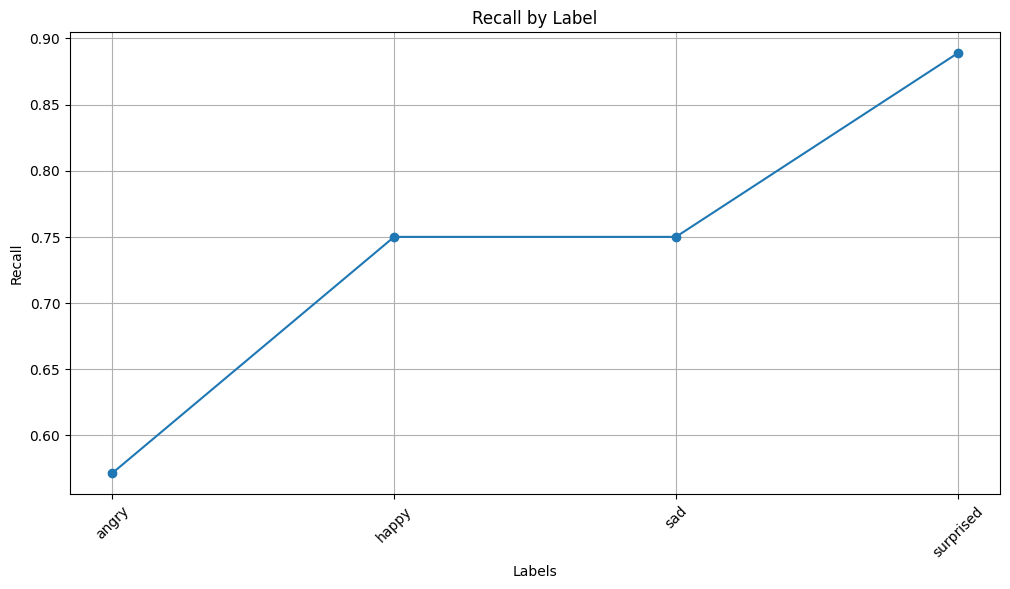

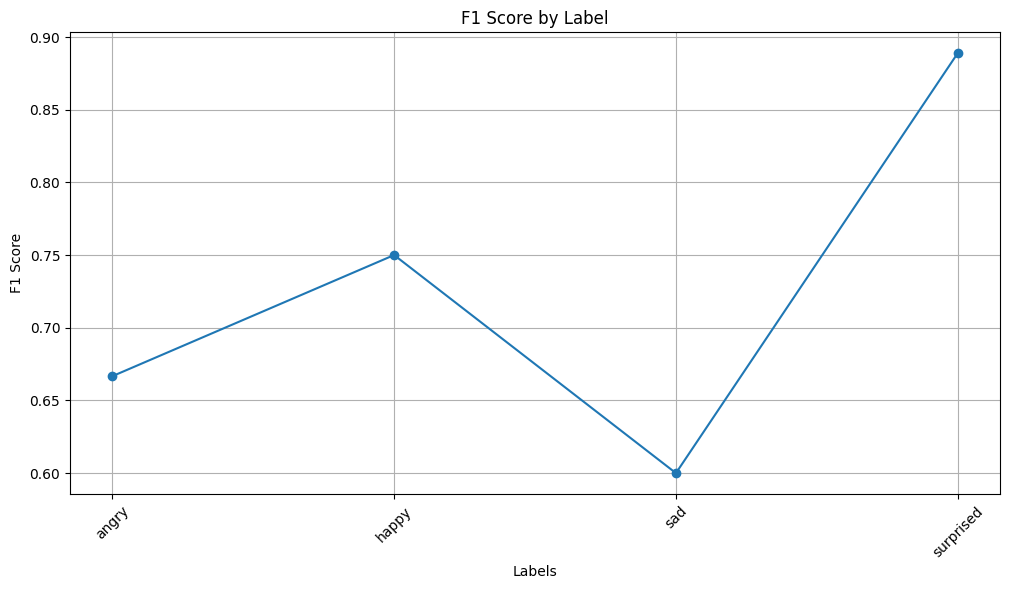

In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Xception modelini yükleme ve yapılandırma
xception_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Üst katmanları eğitmek için bazı katmanları yeniden açma
for layer in xception_model.layers[:100]:
    layer.trainable = False
for layer in xception_model.layers[100:]:
    layer.trainable = True

model = models.Sequential()
model.add(xception_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))



reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.7,
                              patience=4, min_lr=0.000001)

# Early stopping kriterlerini ayarlama
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(X_train, Y_train_one_hot, epochs=70, batch_size=32, validation_data=(X_test, Y_test_one_hot), callbacks=[early_stopping,reduce_lr])

# Modeli eğitme

# Eğitim sonucu
train_loss, train_accuracy = model.evaluate(X_train, Y_train_one_hot)
test_loss, test_accuracy = model.evaluate(X_test, Y_test_one_hot)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

import matplotlib.pyplot as plt

# Eğitim ve doğrulama accuracy değerlerini grafik üzerinde gösterme
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Eğitim ve doğrulama loss değerlerini grafik üzerinde gösterme
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import seaborn as sns

# Tahminleri alalım
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test_one_hot, axis=1)

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_fscore_support

# Precision, Recall, F1 Score
report = classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_, output_dict=True)
print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_))


# Confusion matrix'i oluşturma
cm = confusion_matrix(y_true, y_pred_classes)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
cmd.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# ROC eğrisi ve AUC skoru
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = Y_test_one_hot.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_one_hot[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'brown', 'pink']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'
                                                       ''.format(label_encoder.classes_[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision, Recall, F1 Score Graphs
labels = list(report.keys())[:-3]  # Son 3 öğe toplam metrikler için, sınıf adları değil
precision = [report[label]['precision'] for label in labels]
recall = [report[label]['recall'] for label in labels]
f1_score = [report[label]['f1-score'] for label in labels]

# Precision Graph
plt.figure(figsize=(12, 6))
plt.plot(labels, precision, marker='o')
plt.xlabel('Labels')
plt.ylabel('Precision')
plt.title('Precision by Label')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Recall Graph
plt.figure(figsize=(12, 6))
plt.plot(labels, recall, marker='o')
plt.xlabel('Labels')
plt.ylabel('Recall')
plt.title('Recall by Label')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# F1 Score Graph
plt.figure(figsize=(12, 6))
plt.plot(labels, f1_score, marker='o')
plt.xlabel('Labels')
plt.ylabel('F1 Score')
plt.title('F1 Score by Label')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

